## Thickness Classifying ##
#### Primary Author: Olivia Schriber
Approach:
1. Read in image
2. Mask with hsv
3. Blur 5,5 
4. thresh image
5. dot on COM



In [1]:
import cv2
import numpy as np
import math
import colorsys

img1 = cv2.imread("Images/GRAPHENE/ml_1/ml_a_10x.jpg")


4915200
[[-1.03573441 -1.08551862 -2.99614996]
 [-0.46248962  1.07113197 -4.27748964]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


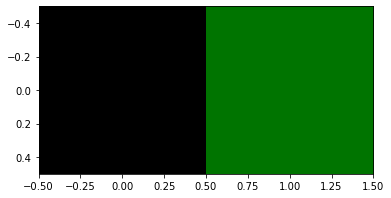

In [2]:
#https://www.dataquest.io/blog/tutorial-colors-image-clustering-python/
# trying to cluster to find most common pixel

import PIL
import matplotlib
import scipy


from matplotlib import image as img
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans

image = img.imread('Images/GRAPHENE/ml_1/ml_a_10x.jpg')

image.reshape(2560, 1920, 3)

r = []
g = []
b = []
for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        
print(len(r))
    

df = pd.DataFrame({'red': r,
'blue': b,
'green': g})


df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)


cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

print(cluster_centers)

colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
        ))
plt.imshow([colors])
plt.show()


In [3]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
# RGB what we want rgba(136,121,222,255)
# RGB what we dont rgba(144,131,221,255)

# hsv color picker from image https://imagecolorpicker.com/en 

hsvwant=colorsys.rgb_to_hsv(136,121,222)
hsvwant=list(hsvwant)
hsvwant[0] = hsvwant[0]*180
hsvwant[1]=hsvwant[1]*255
hsvwant[0]*255
print(hsvwant)


hsvdontwant=colorsys.rgb_to_hsv(144,131,221)
hsvdontwant=list(hsvdontwant)
hsvdontwant[0] = hsvdontwant[0]*180
hsvdontwant[1]=hsvdontwant[1]*255
hsvdontwant[0]*255
print(hsvdontwant) 

#biayermask bl2
#mask_contrast = cv2.inRange(hsv, (120, 104, 0), (122, 120, 255))

#bi?layer mask 50x for bl_1 
#mask_contrast = cv2.inRange(hsv, (135, 0, 0), (150, 100, 255))

#monolayermask, somewhat works with ml_2, not so much with ml_3, not at all w ml_1
#mask_contrast = cv2.inRange(hsv, (120, 104, 0), (122, 120, 255))

#monolayermask ml_1
mask_contrast = cv2.inRange(hsv, (120, 105, 0), (125, 125, 255))

cv2.imwrite('Images/GRAPHENE/ml_1/ml_a_10xMASKED.jpg', mask_contrast)


[124.45544554455445, 116.01351351351352, 222]
[124.33333333333334, 103.84615384615384, 221]


True

In [4]:
maskblur= cv2.blur(mask_contrast, (5,5))
thresh = cv2.threshold(maskblur, 200, 255, cv2.THRESH_BINARY)[1]
cv2.imwrite('Images/GRAPHENE/ml_1/ml_a_10xTHRESHED.jpg', thresh)

True

In [5]:
M = cv2.moments(thresh)
cX = int(M["m10"]/M["m00"])
cY = int(M["m01"]/M["m00"])
print(f'Center : ({cX}, {cY})') # center of mass

img1wcirc = cv2.circle(img1, (cX,cY), 2, (0,0,255), 10) #draw center of mass (for specific color) circle on image
cv2.imwrite('Images/GRAPHENE/ml_1/ml_a_10xImgWithCOM.jpg',img1wcirc )


Center : (1186, 952)


True

In [40]:
## Finding background color 

#https://medium.com/generalist-dev/background-colour-detection-using-opencv-and-python-22ed8655b243

imagehere = cv2.imread("Images/GRAPHENE/bl_1/bl_a_50x.jpg",1)

colors_count={}


(channel_b, channel_g, channel_r) = cv2.split(imagehere)
    
channel_b = channel_b.flatten()
channel_g = channel_g.flatten()  
channel_r = channel_r.flatten()
        
for i in range(len(channel_b)):
    RGB = tuple([channel_r[i], channel_g[i], channel_b[i]])
    if RGB in colors_count:
        colors_count[RGB] += 1
    else:
        colors_count[RGB] = 1
                
print("I have counted my colors")
                
j=0;
for keys in sorted(colors_count, key=colors_count.__getitem__):
    j=j+1
            # Prints 'key: value'
    # print(keys, ": ",colors_count[keys])
    if j==len(colors_count):
        max_seen=keys
        red_oi=max_seen[0]
        green_oi=max_seen[1]
        blue_oi=max_seen[2]
        
blank_img = cv2.imread("Images/Logotesting/white_sqaure.png")

bkgnd_color = ( int (max_seen [ 2 ]), int (max_seen[ 1 ]), int (max_seen [ 0 ])) 
        
color_swatch=cv2.circle(blank_img, (200,200), 2, bkgnd_color, 150) #draw center of mass (for specific color) circle on image)
                       
cv2.imwrite("Images/GRAPHENE/bl_1/bl_a_50x_backgroundcolor.jpg", color_swatch)

print(bkgnd_color)

hsv_bkgnd_color=colorsys.rgb_to_hsv(bkgnd_color[0],bkgnd_color[1],bkgnd_color[2])



hsv_bkgnd_color=list(hsv_bkgnd_color)
hsv_bkgnd_color[0] = hsv_bkgnd_color[0]*180
hsv_bkgnd_color[1]=hsv_bkgnd_color[1]*255


h_bkgnd=hsv_bkgnd_color[0]
s_bkgnd=hsv_bkgnd_color[1]
v_bkgnd=hsv_bkgnd_color[2]

print(hsv_bkgnd_color)
hsv = cv2.cvtColor(imagehere, cv2.COLOR_BGR2HSV)

mask_contrast_wbkgnd_bilayer = cv2.inRange(hsv, (h_bkgnd-31, 0, 0), (h_bkgnd-22, s_bkgnd+20, 255))
    
cv2.imwrite('Images/GRAPHENE/bl_1/bl_a_50xMASKEDWBKGND.jpg', mask_contrast_wbkgnd_bilayer)
maskblurwbkgnd= cv2.blur(mask_contrast_wbkgnd_bilayer, (5,5))
threshwbkgnd= cv2.threshold(maskblurwbkgnd, 200, 255, cv2.THRESH_BINARY)[1]
cv2.imwrite('Images/GRAPHENE/bl_1/ml_a_50xTHRESHEDWBKGND.jpg', threshwbkgnd)
                

I have counted my colors
(202, 132, 163)
[166.71428571428572, 88.36633663366337, 202]


True